In [1]:
#install
!pip install streamlit
!pip install langchain
!pip install openai
!pip install -U langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.0/990.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.8/328.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import streamlit as st
import os
os.environ["OPENAI_API_KEY"] = ""

st.set_page_config(page_title="email generator", page_icon=":robot:")
st.header("email generator")

2024-07-21 05:23:34.506 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [3]:
#input section
def getEmail():
    input_text = st.text_area(label="메일 입력", label_visibility='collapsed',
                              placeholder="당신의 메일은...", key="input_text")
    return input_text

input_text = getEmail()

2024-07-21 05:24:10.174 Session state does not function when running a script without `streamlit run`


In [4]:
#define a template
query_template = """
    메일을 작성해주세요.
    아래는 이메일입니다:
    이메일: {email}
"""

In [5]:
from langchain import PromptTemplate
#create a PromptTemplate instance
prompt = PromptTemplate(
    input_variables=["email"],
    template=query_template,
)

In [6]:
from langchain.chat_models import ChatOpenAI
#call a model
def loadLanguageModel():
    llm = ChatOpenAI(temperature=0.0,model_name='gpt-4')
    return llm

In [8]:
#hint
st.button("*please show me an example*", type='secondary', help="Check the email written by the bot.")
st.markdown("### Emails written by bot")

if input_text:
    llm = loadLanguageModel()
    # Format email using PromptTemplate and language model
    prompt_with_email = prompt.format(email=input_text)
    formatted_email = llm.predict(prompt_with_email)
    # Display formatted emails
    st.write(formatted_email)

## Input UI
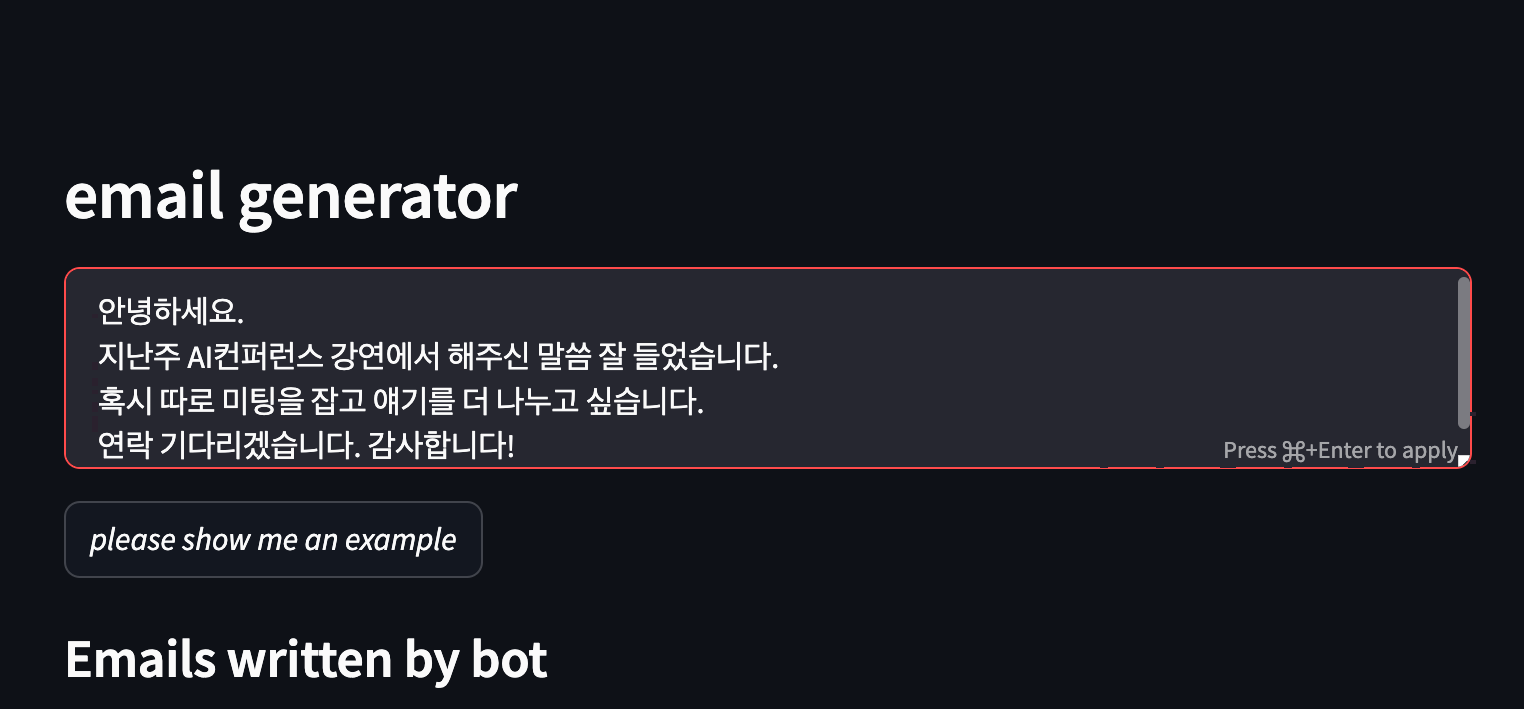

## Output
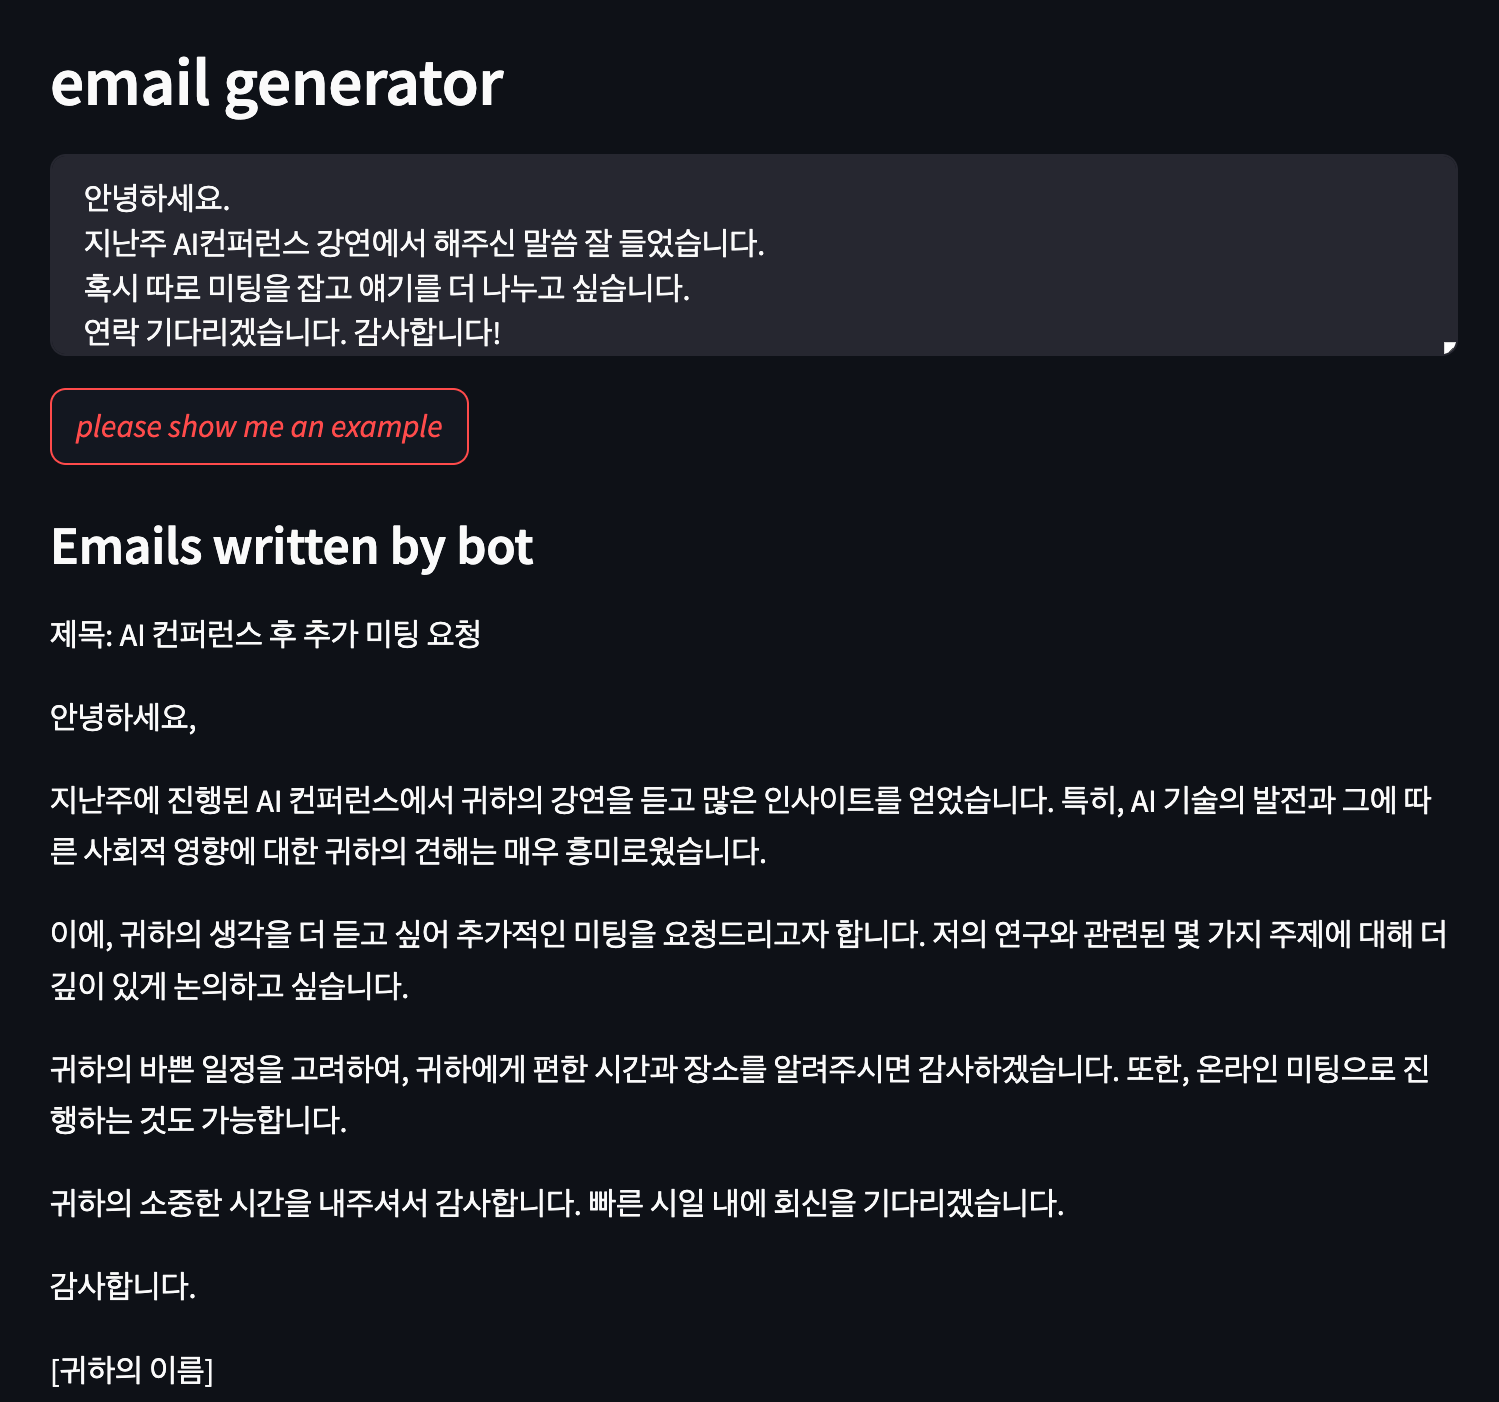